<a href="https://colab.research.google.com/github/imhilla/allmlnotebooks/blob/main/buildingblocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# the mathematical building blocks of neural networks

In [2]:
# a category in a classification problem is called class
# data points are called samples
# the class associated with a specific sample is called label


In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [11]:
# an optimizer - mechanism through which the model will update itself based on the training data it sees, so as to improve it's performance
# a loss function - how the model will be able to measure it's performance on the training data and thus how it will be able to steer itself in the right direction
# metrics to monitor during training and testing

model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [13]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.2686 - accuracy: 0.9242
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1077 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0702 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0511 - accuracy: 0.9842
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0377 - accuracy: 0.9888


In [14]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 74ms/step


array([5.6919447e-08, 1.6270009e-08, 3.1603740e-06, 7.5399762e-06,
       9.7868007e-12, 1.2523760e-08, 3.4602692e-12, 9.9998897e-01,
       1.9595229e-08, 1.7597587e-07], dtype=float32)

In [15]:
predictions[0].argmax()

7

In [16]:
predictions[0][7]

0.999989

In [17]:
test_labels[0]

7

In [18]:
# evaluating the model on new data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0729 - accuracy: 0.9781
test_acc: 0.9781000018119812


In [ ]:
# 2.2 Data representations for neural networks
# tensor is a container for data

In [22]:
# scalars / rank-0 tensors
# tensor that contains only one number is called a scalar or rank-0 tensor
# you can display the number of axes of a numpy tensor via ndim attribute 
# a scalar tensor has 0 axis (ndim == 0)
# the number of axes of a tensor is also called its rank.
import numpy as np
x = np.array(12)
x
x.ndim

0

In [24]:
# vectors
# an array of numbers is called a vector, or rank-1 tensor or 1D tensor.
x = np.array([12, 3, 6, 14, 7])
x
x.ndim

1

In [25]:
# matrices rank-2 tensors
# an array of vectors is a matrix, or rank-2 tensor or 2D tensor.
# a matrix has two axes, rows and columns
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

In [26]:
# rank 3 tensors
# if you pack matrices in a new array, you obtain a rank-3 tensor
x = np.array([[[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]]])
x.ndim

3

In [30]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images.ndim
train_images.shape
train_images.dtype

dtype('uint8')

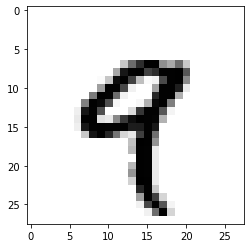

In [31]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [32]:
train_labels[4]

9

In [33]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [35]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [36]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [38]:
# notion of batches
batch = train_images[:128]
batch = train_images[128:256]
n = 3
batch = train_images[128*n:128 *(n+1)]
# batch

In [39]:
# gears of neural networks: Tensor operations